# Installation of Inference Package and Dependencies

To utilize the `inference` package along with its various functionalities, you can install it using pip. The following commands will install the base package and several optional dependencies that enhance its capabilities.

## Installation Commands

Run the following commands in your terminal or command prompt:

```bash
# Install the base inference package
!pip install inference

# Install the inference package with transformers support
!pip install 'inference[transformers]'

# Install the inference package with SAM (Segment Anything Model) support
!pip install 'inference[sam]'

# Install the inference package with CLIP (Contrastive Language-Image Pretraining) support
!pip install 'inference[clip]'

# Install the inference package with gaze estimation support
!pip install 'inference[gaze]'

# Install the inference package with Grounding DINO support
!pip install 'inference[grounding-dino]'

# Install the inference package with YOLO (You Only Look Once) world support
!pip install 'inference[yolo-world]'


In [ ]:
!pip install inference

In [ ]:
!pip install 'inference[transformers]'
!pip install 'inference[sam]'
!pip install 'inference[clip]'
!pip install 'inference[gaze]'
!pip install 'inference[grounding-dino]'
!pip install 'inference[yolo-world]'

## Imports

### 1. Import Libraries

In [57]:
from inference_sdk import InferenceHTTPClient
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

## Inference Client Initialization and Image Inference

This section describes how to set up the inference client using the Roboflow API and perform image inference.

### 2. Initialize the Inference Client

To interact with the Roboflow detection API, create an instance of the `InferenceHTTPClient`:



In [36]:
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="CPW8EMS196yESZgE9ENr"
)

In [58]:
result = CLIENT.infer('tablet.png', model_id="drug-name-detection/1")

## Drug Name Annotation from Inference Result

This section documents the results obtained from the drug name detection inference using the Roboflow API. The output includes details for annotating the detected drug names in the image.

### Inference Result

The inference result returned from the API contains the following components:

```python
result = {
    'inference_id': 'unique_identifier',
    'time': 'processing_time',
    'image': {
        'width': 'image_width',
        'height': 'image_height'
    },
    'predictions': [
        {
            'x': 'top_left_x_coordinate',
            'y': 'top_left_y_coordinate',
            'width': 'bounding_box_width',
            'height': 'bounding_box_height',
            'confidence': 'confidence_score',
            'class': 'object_class',
            'class_id': 'numeric_class_id',
            'detection_id': 'unique_detection_id'
        }
    ]
}


In [37]:
print(result)

{'inference_id': '058f3ea0-f684-4e30-b998-8904be85812d', 'time': 0.05304187299998375, 'image': {'width': 573, 'height': 583}, 'predictions': [{'x': 245.5, 'y': 339.0, 'width': 95.0, 'height': 34.0, 'confidence': 0.781592607498169, 'class': 'drug-name', 'class_id': 0, 'detection_id': '418772ad-5e9e-47d5-8ce5-bc24dd267fc2'}]}


# Loading Results into the Supervision Detections API

This section describes the process of loading the inference results obtained from the Roboflow API into the Supervision Detections API for further processing and annotation.

## Steps to Load Results

1. **Import the Supervision Library**: Ensure that the Supervision library is imported into your project to access its functionalities.

2. **Create Detections Object**: Use the results obtained from the inference to create a `Detections` object. This object will encapsulate the detection data, including the bounding box coordinates and class information.

3. **Use Detections for Annotation**: Once the `Detections` object is created, it can be utilized for annotating images with bounding boxes and labels.

### Example

The following attributes are typically included in the `Detections` object:

- **Bounding Box Coordinates**: Used for defining the area of interest in the image.
- **Class Information**: Helps identify the type of objects detected.
- **Confidence Scores**: Provides insight into the reliability of the detection.

By integrating the inference results with the Supervision Detections API, you can effectively visualize and annotate detected objects in your images.


In [60]:
detections = sv.Detections.from_inference(result1)

In [61]:
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

In [62]:
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)

In [63]:
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)


Display additional information on the image

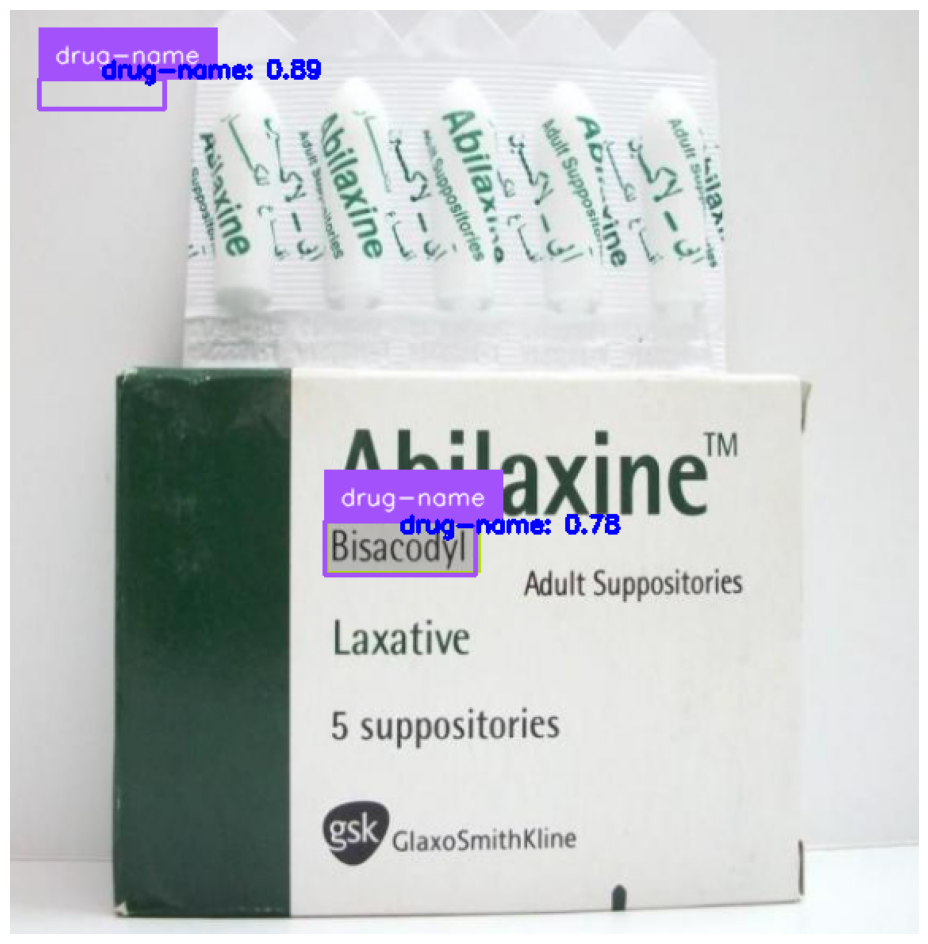

In [52]:
for prediction in result1['predictions']:
    x = int(prediction['x'])
    y = int(prediction['y'])
    width = int(prediction['width'])
    height = int(prediction['height'])
    confidence = prediction['confidence']
    class_name = prediction['class']
    text = f"{class_name}: {confidence:.2f}"
    cv2.putText(annotated_image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
sv.plot_image(annotated_image)

# Optical Character Recognition (OCR) for Image Text Recognition

This section outlines the process of using Optical Character Recognition (OCR) to extract text from images. The OCR method is particularly useful for digitizing printed or handwritten text for further analysis or processing.

## Steps to Perform OCR

1. **Import Required Libraries**: Ensure that you have the necessary libraries installed and imported in your code, such as `transformers`, `torch`, and `PIL`.

2. **Load the Pre-trained OCR Model**: Use a pre-trained model for OCR, such as `TrOCR`, which is designed for recognizing text from images. This model can handle various handwriting and printed text formats.

3. **Load and Preprocess the Image**:
   - Load the image using an appropriate library (e.g., PIL).
   - Convert the image to RGB format to ensure compatibility with the OCR model.

4. **Prepare Input for the Model**: Convert the preprocessed image into a format that the OCR model can accept, typically by transforming it into tensor format.

5. **Perform OCR**:
   - Use the model to generate text predictions from the image.
   - Disable gradient calculation during inference to improve performance and reduce memory usage.

6. **Decode the Predictions**: Convert the model's output into human-readable text by decoding the generated tokens.

7. **Output the Recognized Text**: Display or return the extracted text for further use or processing.

### Example

The following attributes are commonly involved in the OCR process:

- **Input Image**: The source image containing text to be recognized.
- **Output Text**: The text extracted from the image, which can be stored or displayed as needed.

By implementing these steps, you can effectively utilize OCR technology to recognize and extract text from images, enabling various applications such as document digitization, data entry, and content analysis.


Load the OCR model and processor

In [ ]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

Recognized Text: bisacodity .


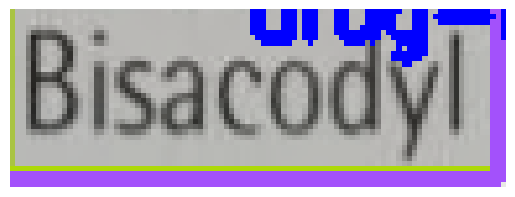

In [59]:
for prediction in result['predictions']:
    x = int(prediction['x'] - 45)
    y = int(prediction['y'] - 15)
    width = int(prediction['width'])
    height = int(prediction['height'])

    x_end = x + width
    y_end = y + height

    x_end = min(x_end, annotated_image.shape[1])
    y_end = min(y_end, annotated_image.shape[0])

    cropped_image = annotated_image[y:y_end, x:x_end]

    pil_cropped_image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    pixel_values = processor(pil_cropped_image, return_tensors="pt").pixel_values

    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
        text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    print("Recognized Text:", text)

    plt.imshow(pil_cropped_image)
    plt.axis('off')
    plt.show()

    cv2.imwrite("cropped_tablet_image.png", cropped_image)


In [64]:
print("Recognized Text:", text)

Recognized Text: bisacodity .


# Output Documentation: Image Annotation and Text Recognition

This document summarizes the process of annotating an image using the Roboflow API and subsequently recognizing text using Optical Character Recognition (OCR).

## Overview

1. **Annotation with Roboflow API**:
   - Use the Roboflow API to annotate an image and identify specific objects (e.g., drug names).
   - Retrieve the inference results, including coordinates of detected objects.

2. **Optical Character Recognition (OCR)**:
   - Apply OCR to the annotated regions of the image to extract text from the detected objects.